# Proyecto: Venta de Seminuevos

### Datos: ??

### Autor: LINO T. JASSO

Objetivo: Realizar un cruce entre la base de la ventas con su localización geográfica por Unidad y Marca. Después identificar los sitios donde se han vendido en más de $200 mil y graficar una distribución.

In [27]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [15]:
df=pd.read_csv('cursoDatosGeograficos/SeminuevosReporte1.csv')
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,NaN,NaN,NaN,NaN,Reporte Carga Inventario Autos Usados,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No.,No. Contrato,Empresa,Cuenta Bancaria,Fecha Carga,Fecha Venta,Unidad,Marca,Modelo,Num Motor,...,Colonia,CP,Municipio,Estado,Tel. Contacto,Nombre Sucursal,Precio Dación,Precio Venta,Usuario Libera,Estatus
5,1,AUTOEXPRESS 0845/LORENZO RICARDO ARENAS LEON,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-10-03 18:07:23.0,2013-12-13 00:00:00.0,PATRIOT BASE FWD MTX,Jeep,2011,ND,...,BOSQUE RESIDENCIAL DEL SUR,16020,XOCHIMILCO,CIUDAD DE MEXICO,5552440214,Plaza Inbursa,142000,132000,,Vendido
6,2,RECUPERACION DE CREDITO 0864 CONTRATO 6020204...,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-11-01 16:53:54.0,2014-01-09 00:00:00.0,206XS,Peugeot,2006,H0032980,...,RINCONADA DEL AUDITORIO,45190,ZAPOPAN,JALISCO,33-38613511,Aguascalientes,41000,41000,,Vendido
7,3,AUTOEXPRESS 0844/RIGOBERTO CORNELIO RAMIREZ AG...,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-10-02 12:10:55.0,2014-05-08 00:00:00.0,200 SEDAN TOURING,Chrysler,2012,ND,...,BOSQUES DE ARAGON,57170,NEZAHUALCOYOTL,MEXICO,55-25813700,Plaza Inbursa,168000,145500,Alfonso Garcia B,Vendido
8,4,AUTOEXPRESS 0846 / ADRIANA GUADALUPE MOLINA SA...,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,NaN,2013-10-03 18:19:13.0,2013-12-19 00:00:00.0,LIBERTY SPORT 4X2,Jeep,2006,ND,...,FRACC. EL SOL,76130,QUERETARO,QUERETARO,44-22389082,NaN,NaN,80122,,Vendido
9,5,AUTOEXPRESS 0851/ANGEL DAVID AVENDAÑO,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-10-03 19:16:10.0,2013-12-16 00:00:00.0,LANCER,Mitsubishi,2012,ND,...,PARQUE RESIDENCIAL COACALCO,55720,COACALCO,MEXICO,55-52442581,Plaza Inbursa,160000,136576,,Vendido


In [16]:
df.loc[4:,:]
df= df.loc[4:,:]

In [17]:
df.columns=df.loc[4:4,:].values.tolist()

In [18]:
df= df.loc[5:,:]

In [19]:
df.head()

,No.,No. Contrato,Empresa,Cuenta Bancaria,Fecha Carga,Fecha Venta,Unidad,Marca,Modelo,Num Motor,...,Colonia,CP,Municipio,Estado,Tel. Contacto,Nombre Sucursal,Precio Dación,Precio Venta,Usuario Libera,Estatus
5,1,AUTOEXPRESS 0845/LORENZO RICARDO ARENAS LEON,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-10-03 18:07:23.0,2013-12-13 00:00:00.0,PATRIOT BASE FWD MTX,Jeep,2011,ND,...,BOSQUE RESIDENCIAL DEL SUR,16020,XOCHIMILCO,CIUDAD DE MEXICO,5552440214,Plaza Inbursa,142000,132000,,Vendido
6,2,RECUPERACION DE CREDITO 0864 CONTRATO 6020204...,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-11-01 16:53:54.0,2014-01-09 00:00:00.0,206XS,Peugeot,2006,H0032980,...,RINCONADA DEL AUDITORIO,45190,ZAPOPAN,JALISCO,33-38613511,Aguascalientes,41000,41000,,Vendido
7,3,AUTOEXPRESS 0844/RIGOBERTO CORNELIO RAMIREZ AG...,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-10-02 12:10:55.0,2014-05-08 00:00:00.0,200 SEDAN TOURING,Chrysler,2012,ND,...,BOSQUES DE ARAGON,57170,NEZAHUALCOYOTL,MEXICO,55-25813700,Plaza Inbursa,168000,145500,Alfonso Garcia B,Vendido
8,4,AUTOEXPRESS 0846 / ADRIANA GUADALUPE MOLINA SA...,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,NaN,2013-10-03 18:19:13.0,2013-12-19 00:00:00.0,LIBERTY SPORT 4X2,Jeep,2006,ND,...,FRACC. EL SOL,76130,QUERETARO,QUERETARO,44-22389082,NaN,NaN,80122,,Vendido
9,5,AUTOEXPRESS 0851/ANGEL DAVID AVENDAÑO,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2013-10-03 19:16:10.0,2013-12-16 00:00:00.0,LANCER,Mitsubishi,2012,ND,...,PARQUE RESIDENCIAL COACALCO,55720,COACALCO,MEXICO,55-52442581,Plaza Inbursa,160000,136576,,Vendido


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 5 to 1823
Data columns (total 41 columns):
(No.,)                       1819 non-null object
(No. Contrato,)              1819 non-null object
(Empresa,)                   1819 non-null object
(Cuenta Bancaria,)           1803 non-null object
(Fecha Carga,)               1819 non-null object
(Fecha Venta,)               1680 non-null object
(Unidad,)                    1819 non-null object
(Marca,)                     1819 non-null object
(Modelo,)                    1819 non-null object
(Num Motor,)                 1819 non-null object
(Num Serie,)                 1819 non-null object
(Kilometraje,)               1817 non-null object
(Estado Motor,)              1819 non-null object
(Estado Carroceria,)         1819 non-null object
(Estado Interiores,)         1819 non-null object
(Presupuesto Motor,)         1800 non-null object
(Presupuesto Carroceria,)    1800 non-null object
(Presupuesto Interiores,)    1800 non-null 

In [147]:
df.loc[(df.(Precio_Venta).astype(int)>200000)&(df.Estatus=='200m'),:]

SyntaxError: invalid syntax (<ipython-input-147-5bd8be6180e2>, line 1)

In [140]:
df.loc[df.Estatus.isin(['Venta','Disponible']),:].sample(5)\
            .sort_values('No. Contrato',ascending=True)

AttributeError: 'DataFrame' object has no attribute 'Estatus'

In [30]:
data = [{'Municipio': 1, 'Colonia': 2}, {'Municipio': 5, 'Colonia': 10, 'Estatus': 20}]
df=pd.DataFrame(data)
df

,Colonia,Estatus,Municipio
0,2,NaN,1
1,10,20.0,5


In [36]:
df.prod(axis=0)

Colonia      20.0
Estatus      20.0
Municipio     5.0
dtype: float64

In [84]:
gdf = gpd.read_file('cursoDatosGeograficos/Municipios/')
gdf.head(10)

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((2793795.252400003 814557.6070000008,..."
1,09,013,Xochimilco,2,"POLYGON ((2800673.726999998 804500.9276000001,..."
2,09,008,La Magdalena Contreras,3,"POLYGON ((2788802.361100003 811568.5179999992,..."
3,09,002,Azcapotzalco,4,"POLYGON ((2797499.0814 836759.364599999, 27975..."
4,09,014,Benito Juárez,5,"POLYGON ((2799250.717 820719.6733000018, 27992..."
5,09,015,Cuauhtémoc,6,"POLYGON ((2795912.471100003 825873.3478000015,..."
6,09,010,Álvaro Obregón,7,"POLYGON ((2794395.921300001 824857.5522999987,..."
7,09,005,Gustavo A. Madero,8,"POLYGON ((2801415.9639 846522.8564999998, 2801..."
8,09,004,Cuajimalpa de Morelos,9,"POLYGON ((2787229.790399998 825329.2840999998,..."
9,09,016,Miguel Hidalgo,10,"POLYGON ((2796916.935599998 831624.1893999986,..."


In [43]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [44]:
type(gdf[['CVE_ENT','CVE_MUN','OID']])

pandas.core.frame.DataFrame

In [45]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 5 columns):
CVE_ENT     2456 non-null object
CVE_MUN     2456 non-null object
NOM_MUN     2456 non-null object
OID         2456 non-null int64
geometry    2456 non-null object
dtypes: int64(1), object(4)
memory usage: 96.0+ KB


In [46]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

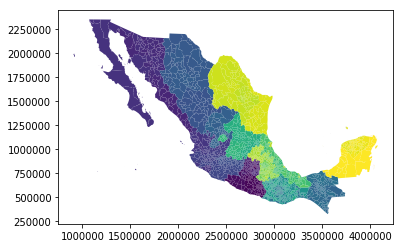

In [47]:
gdf.plot(column='OID')

In [136]:
gdf = gdf.loc[gdf.CVE_ENT=='05',:]
gdf.plot(column='OID')

AttributeError: 'DataFrame' object has no attribute 'CVE_ENT'

In [49]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [51]:
gpd.read_file('cursoDatosGeograficos/data/delegaciones.json')

,cvegeo,municipio,geometry
0,9010,ALVARO OBREGON,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
1,9002,AZCAPOTZALCO,"POLYGON ((-99.20688081 19.47120497, -99.207120..."
2,9014,BENITO JUAREZ,"POLYGON ((-99.18894424 19.39556665, -99.187556..."
3,9003,COYOACAN,"POLYGON ((-99.10069169 19.29984584, -99.103266..."
4,9004,CUAJIMALPA,"POLYGON ((-99.25561125999999 19.40427641, -99...."
5,9015,CUAUHTEMOC,"POLYGON ((-99.12572428 19.40425509, -99.127240..."
6,9005,GUSTAVO A MADERO,"POLYGON ((-99.07539946999999 19.44866099, -99...."
7,9006,IZTACALCO,"POLYGON ((-99.13541011 19.37723098, -99.134945..."
8,9007,IZTAPALAPA,"POLYGON ((-99.06164945 19.29332949, -99.061707..."
9,9008,MAGDALENA CONTRERAS,"POLYGON ((-99.24178889 19.28882408, -99.241656..."


In [68]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Text(0.5,1,'WGS84 (lat/lon)')

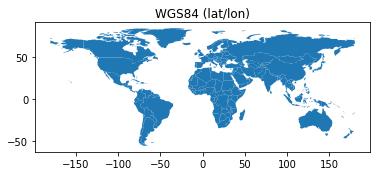

In [69]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)")

In [70]:
world.crs

{'init': 'epsg:4326'}

In [73]:
world = world.to_crs({'init': 'epsg:3395'})
world.crs

{'init': 'epsg:3395'}

Text(0.5,1,'Mercator')

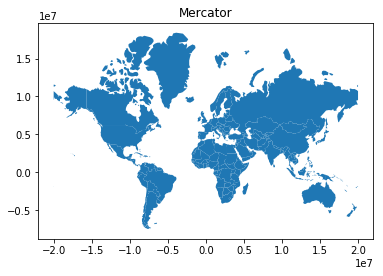

In [75]:
ax = world.plot()
ax.set_title("Mercator")

In [82]:
gdf

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
2249,05,035,Torreón,2250,"(POLYGON ((2356918.6545 1473496.704100002, 236..."
2250,05,024,Parras,2251,"POLYGON ((2485059.254900001 1596373.762899999,..."
2251,05,017,Matamoros,2252,"POLYGON ((2377931.720100001 1523551.292100001,..."
2252,05,038,Zaragoza,2253,"POLYGON ((2511244.095600002 1858712.730500001,..."
2253,05,037,Villa Unión,2254,"POLYGON ((2630901.673600003 1796455.5733, 2630..."
2254,05,036,Viesca,2255,"POLYGON ((2411439.661700003 1508566.203400001,..."
2255,05,034,Sierra Mojada,2256,"POLYGON ((2354618.709899999 1824775.392700002,..."
2256,05,033,San Pedro,2257,"POLYGON ((2452845.078199998 1590444.120000001,..."
2257,05,032,San Juan de Sabinas,2258,"POLYGON ((2545212.475100003 1780643.132199999,..."
2258,05,031,San Buenaventura,2259,"POLYGON ((2459532.121100001 1786417.7568, 2459..."


In [94]:
from shapely.geometry import Point, LineString, \
            MultiPoint, MultiLineString, Polygon, MultiPolygon

In [95]:
gdf = pd.read_csv('cursoDatosGeograficos/SeminuevosReporte1.csv').sample(10)
gdf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
477,473,60266468,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2015-06-09 10:30:28.0,2015-06-29 00:00:00.0,I10_GL PLUS AC M,Dodge,2012,HECHO EN INDIA,...,SAN NICOLAS TOLENTINO,09860,IZTAPALAPA,CIUDAD DE MEXICO,55-52229634,Jalapa,59000,57230,Lino T Jasso,Vendido
1711,21,60282763,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2015-07-02 10:30:25.0,NaN,AVENGER_SXT ATX 2.4L SPOILER TRASERO SENSORES ...,Dodge,2012,HECHO EN USA,...,NaN,NaN,NaN,NaN,NaN,Hermosillo,140000,NaN,Lino T Jasso,Disponible
1555,1551,60516158,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2017-03-15 15:34:02.0,2017-04-17 00:00:00.0,JOURNEY_SE 7 PAS,Dodge,2016,HECHO EN MEXICO,...,FRACC. ALAMOS,25210,SALTILLO,COAHUILA DE ZARAGOZA,84-44160707,Hermosillo,226000,234205,Lino T Jasso,Vendido
1657,1653,60775189,"FC FINANCIAL, S.A DE C.V., SOFOM, E.R., GRUPO ...","Banco:Inbursa, Cuenta:50030379730, Clabe:03618...",2017-09-28 12:22:08.0,2017-10-11 00:00:00.0,AVEO_LS AAC TA,Chevrolet,2014,HECHO EN MEXICO,...,SAN PABLO DE LA CRUZ PROGRESO INDUSTRIAL,54460,NICOLAS ROMERO,MEXICO,55-58231921,Guadalajara Minerva,70000,70000,Lino T Jasso,Vendido
730,726,60298084,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2014-11-25 17:59:27.0,2015-01-06 00:00:00.0,PATRIOT_LIMITED FWD CVT 4 PTAS 4 CIL,Jeep,2012,HECHO EN USA,...,ANAHUAC,11320,MIGUEL HIDALGO,CIUDAD DE MEXICO,55-57060405,PLAZA INBURSA 1,167000,181400,Lino T Jasso,Vendido


In [105]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Plaza Cuicuilco CDMX")
location

Location(Plaza Cuicuilco, Zapote, Equipamiento Fábrica FISISA, Tlalpan, CDMX, 14060, México, (19.2981953, -99.181221285, 0.0))

In [112]:
def make_point(row):
    p = Point(row.Longitude,row.Latitude)
    return p

In [135]:
venta = pd.read_csv('cursoDatosGeograficos/SeminuevosReporte1.csv').sum()
venta.head()

Series([], dtype: float64)

In [127]:
gdf

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
477,473,60266468,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2015-06-09 10:30:28.0,2015-06-29 00:00:00.0,I10_GL PLUS AC M,Dodge,2012,HECHO EN INDIA,...,SAN NICOLAS TOLENTINO,09860,IZTAPALAPA,CIUDAD DE MEXICO,55-52229634,Jalapa,59000,57230,Lino T Jasso,Vendido
1711,21,60282763,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2015-07-02 10:30:25.0,NaN,AVENGER_SXT ATX 2.4L SPOILER TRASERO SENSORES ...,Dodge,2012,HECHO EN USA,...,NaN,NaN,NaN,NaN,NaN,Hermosillo,140000,NaN,Lino T Jasso,Disponible
1555,1551,60516158,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2017-03-15 15:34:02.0,2017-04-17 00:00:00.0,JOURNEY_SE 7 PAS,Dodge,2016,HECHO EN MEXICO,...,FRACC. ALAMOS,25210,SALTILLO,COAHUILA DE ZARAGOZA,84-44160707,Hermosillo,226000,234205,Lino T Jasso,Vendido
1657,1653,60775189,"FC FINANCIAL, S.A DE C.V., SOFOM, E.R., GRUPO ...","Banco:Inbursa, Cuenta:50030379730, Clabe:03618...",2017-09-28 12:22:08.0,2017-10-11 00:00:00.0,AVEO_LS AAC TA,Chevrolet,2014,HECHO EN MEXICO,...,SAN PABLO DE LA CRUZ PROGRESO INDUSTRIAL,54460,NICOLAS ROMERO,MEXICO,55-58231921,Guadalajara Minerva,70000,70000,Lino T Jasso,Vendido
730,726,60298084,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2014-11-25 17:59:27.0,2015-01-06 00:00:00.0,PATRIOT_LIMITED FWD CVT 4 PTAS 4 CIL,Jeep,2012,HECHO EN USA,...,ANAHUAC,11320,MIGUEL HIDALGO,CIUDAD DE MEXICO,55-57060405,PLAZA INBURSA 1,167000,181400,Lino T Jasso,Vendido
335,331,60236983,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2017-05-31 12:33:15.0,2017-06-14 00:00:00.0,ATOS_BASICO MANUAL,Dodge,2012,HECHO EN INDIA,...,SAN CRISTOBAL TEPONTLA,72760,SAN PEDRO CHOLULA,PUEBLA,22-21517472,Jalapa,23000,28370,Lino T Jasso,Vendido
1705,15,60239640,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2015-11-17 12:38:44.0,NaN,ATOS_BASICO A/ACONDICIONADO,Dodge,2012,HECHO EN INDIA,...,NaN,NaN,NaN,NaN,NaN,Tampico,35000,NaN,Lino T Jasso,Disponible
105,101,108021,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2016-04-19 18:21:51.0,2016-05-13 00:00:00.0,I10,Dodge,2013,INDIA,...,LINDAVISTA,54147,GUSTAVO A MADERO,CIUDAD DE MEXICO,5553090271,NaN,0,62035,Alfonso Garcia B,Vendido
933,929,60324390,SOFOM INBURSA S.A. DE C.V. SOFOM E.R. GRUPO FI...,"Banco:Inbursa, Cuenta:CREDITO DIRECTO CTA: 500...",2015-07-29 13:52:04.0,2015-11-06 00:00:00.0,AVENGER_SXT ATX 2.4L,Dodge,2013,HECHO EN USA,...,DEL MAR,13270,TLAHUAC,CIUDAD DE MEXICO,55-5591388600,PREDIO COPILCO,163000,158110,Lino T Jasso,Vendido
109,105,122178,BANCO INBURSA S.A. INSTITUCION DE BANCA MULTIP...,"Banco:Inbursa, Cuenta:50008405871, Clabe:03618...",2017-06-19 10:08:15.0,2017-07-06 00:00:00.0,I 10,Chrysler,2013,INDIA,...,FRACC NUEVA GALICIA,45036,ZAPOPAN,JALISCO,33-3331343272,NaN,0,54720,Alfonso Garcia B,Vendido


In [137]:
hacerPoint = lambda row: Point(row.x,row.y)
SeminuevosReporte1['geometry'] = SeminuevosReporte1.apply(hacerPoint,axis=1)
SeminuevosReporte1 = gpd.GeoDataFrame(SeminuevosReporte1,geometry='geometry')

NameError: name 'SeminuevosReporte1' is not defined

In [113]:
SeminuevosReporte1['geometry'] = SeminuevosReporte1.apply(make_point,axis=1)

NameError: name 'SeminuevosReporte1' is not defined

In [138]:
df.groupby(['Marca','Unidad']).sum()

KeyError: 'Marca'

In [139]:
%matplotlib inline
SeminuevosReporte1.plot()

NameError: name 'SeminuevosReporte1' is not defined